> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate the evolution of life expectancy of the countries and the effects of GDP & population

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

Life expectancy in every country has changed along the years. Nowadays high life expectancies can be observed in richer countries compared to the poorer ones. The analysis will be focus on investigate the evolution of the life expectancy as well as the dependency on GDP per capita and population. It will also investigated whether the total amound of money dedicated to health by the goverment influences the life expectancy, especially the private share of total health investment.

From Gapminder website serveral indicators were selected for supporting the analysis, namely:

- Life expectancy at bith (in years) 
- GDP or Gross Domestic Product per capita
- Population
- Total health investment (% GDP)
- Private share in the health investment

As the existence of data is limited, that means, not for all the countries there is information about life expectancy and those countries with data sometimes evolution with years is also limited to a timeframe. Taking this into consideration, there are some questions than can be raised:

1) How did life expectancy evolve with the time in the World?
2)


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

# -*- coding: utf-8 -*-

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlrd

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


To perform the analysis presented in the **Introduction**, several Gapminder indicators will be downloaded and exported from Excel to create a pandas Dataframe. the indicators are:
- __[indicator life_expectancy_at_birth.xlsx](https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj2tPLxKvvnNPA&output=xlsx)__
- __[indicator gapminder gdp_per_capita_ppp.xlsx](https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xlsx)__
- __[indicator gapminder population.xlsx](https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&output=xlsx)__
- __[indicator total health expenditure perc of GDP.xlsx](https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj3XYThRy0yJMA&output=xlsx)__
- __[indicator private share of total health spending.xls.xlsx](https://docs.google.com/spreadsheet/pub?key=pyj6tScZqmEcXBFxQw8cFaw&output=xlsx)__


The data in each Excel spreadsheet is included in the Sheet='Data' and I will not use any column to assign row labels.

In [225]:
life_df = pd.read_excel('indicator life_expectancy_at_birth.xlsx', 'Data', index_col=None)

To have a quick look at the dataframe created, head() and info() methods are used

In [226]:
life_df.head()


,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [264]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, Afghanistan to South Sudan
Columns: 217 entries, 1800 to 2016
dtypes: float64(217)
memory usage: 352.3+ KB


After printing out the head of the "life expectancy" dataframe that was created and using the method info(), it can be observed the following:
 - the countries column has a wrong label
 - the data extends from 1800 to 2016, and they values are of the type float64
 - NaNs can be found throughout the dataframe
 - 'years' is not a column but the column labels
 - the type of the years might be strind rather than integer
 
Some operations will be done: 
- Renaming the label of the column containing countries to 'country'
- I will set the country column as row indexes, to make easy later on the use of stack() method.
- NaNs will be drop
- I will "transpose" the header to be one column
- type of the years shall be checked out and if string type is found, this shall be converted to numeric

In [217]:
life_df1.tail()

,country,year,life
43611,South Sudan,2011,55.9
43612,South Sudan,2012,56.0
43613,South Sudan,2013,56.0
43614,South Sudan,2014,56.1
43615,South Sudan,2015,56.1


Same procedure will be followed for the next indicator: **GDP per capita**

In [218]:
GDP_df = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx', 'Data', index_col=None)
GDP_df.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [222]:
GDP_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, Afghanistan to South Sudan
Columns: 216 entries, 1800 to 2015
dtypes: float64(216)
memory usage: 340.8+ KB


After printing out the head of the "GDP" dataframe that was created and using the method info(), it can be observed the following:
 - the countries column has a wrong label
 - the data extends from 1800 to 2015, and they values are of the type float64
 - NaNs can be found throughout the dataframe
 - 'years' is not a column but the column labels
 - the type of the years might be string rather than integer
 
Some operations will be done: 
- Renaming the label of the column containing countries to 'country'
- I will set the country column as row indexes, to make easy later on the use of stack() method.
- NaNs will be drop
- I will "transpose" the header to be one column
- type of the years shall be checked out and if string type is found, this shall be converted to numeric

Same procedure will be followed for the next indicator: **Population**

In [265]:
population_df = pd.read_excel('indicator gapminder population.xlsx', 'Data', index_col=None)
population_df.head()

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [266]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 82 columns):
Total population    275 non-null object
1800                229 non-null float64
1810                229 non-null float64
1820                229 non-null float64
1830                229 non-null float64
1840                229 non-null float64
1850                229 non-null float64
1860                229 non-null float64
1870                229 non-null float64
1880                229 non-null float64
1890                229 non-null float64
1900                229 non-null float64
1910                229 non-null float64
1920                229 non-null float64
1930                229 non-null float64
1940                229 non-null float64
1950                256 non-null float64
1951                256 non-null float64
1952                256 non-null float64
1953                256 non-null float64
1954                256 non-null float64
1955                256 non-null fl

After printing out the head of the "population" dataframe that was created and using the method info(), it can be observed the following:
 - the countries column has a wrong label
 - the data extends from 1800 to 2015, and they values are of the type float64, except the first colum, that is, the country column that are strings
 - depending on the year, the number of countries with information differs, this is the reason to have a large info() output. 
 - NaNs can be found throughout the dataframe
 - 'years' is not a column but the column labels
 - the type of the years might be string rather than integer
 
Some operations will be done: 
- Renaming the label of the column containing countries to 'country'
- I will set the country column as row indexes, to make easy later on the use of stack() method.
- NaNs will be drop
- I will "transpose" the header to be one column
- type of the years shall be checked out and if string type is found, this shall be converted to numeric

Now I can load the datasets with indicators related to health expenditure: total health expenditure and other datasets related to disasters. Those indicators will be merged in a dataframe for the time being.

In [102]:
health_exp_df = pd.read_excel('indicator total health expenditure perc of GDP.xlsx', 'Data', index_col=None)
health_exp_df.head()

,Total expenditure on health as percentage of GDP (gross domestic product),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.716590,6.819749,6.356457,6.630313,6.769914,7.301355,6.979427,7.579306,7.584483
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,2.559558,4.041886,4.806430,5.338640,5.833766,6.350044,6.044854,6.277196,6.163815,6.883454,6.840532,6.731867,6.877242,6.748861,6.883065,6.547298
4,Algeria,4.173543,3.788035,4.060305,4.063201,3.868854,3.489033,3.837877,3.873390,3.744365,3.378307,3.064177,3.129454,3.534485,3.733193,4.576056,4.172063


In [103]:
health_exp_df.dropna(inplace=True)
health_exp_df.rename(columns={str('Total expenditure on health as percentage of GDP (gross domestic product)'): 'country'}, inplace=True)
health_exp_df.set_index('country', inplace=True)
health_exp_df.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Albania,2.559558,4.041886,4.806430,5.338640,5.833766,6.350044,6.044854,6.277196,6.163815,6.883454,6.840532,6.731867,6.877242,6.748861,6.883065,6.547298
Algeria,4.173543,3.788035,4.060305,4.063201,3.868854,3.489033,3.837877,3.873390,3.744365,3.378307,3.064177,3.129454,3.534485,3.733193,4.576056,4.172063
Andorra,7.644394,8.029186,8.026615,9.847322,7.352147,7.585239,6.792229,7.044575,7.120286,7.111577,7.224219,7.443895,7.553074,7.544590,7.522054,7.522876
Angola,3.794290,2.164772,2.260741,1.855355,1.937973,2.408962,3.449842,2.364108,2.639531,2.086834,1.959893,2.415178,2.522288,3.190209,4.946633,2.850614
Antigua and Barbuda,4.876219,4.606434,4.642401,4.641577,4.676057,4.767773,4.611381,4.621272,4.708811,4.664697,4.662399,4.521800,4.445126,4.296673,4.806066,6.027904


In [113]:
health_exp_df1 = pd.DataFrame(health_exp_df.stack())
health_exp_df1.reset_index(inplace=True)
health_exp_df1.rename(columns={'level_1': 'year', 0 : 'health_expenditure'}, inplace=True)
pd.to_numeric(health_exp_df1['year'])
health_exp_df1.head()

,country,year,health_expenditure
0,Albania,1995,2.559558
1,Albania,1996,4.041886
2,Albania,1997,4.806430
3,Albania,1998,5.338640
4,Albania,1999,5.833766


In [115]:
health_exp_priv_df = pd.read_excel('indicator private share of total health spending.xls.xlsx', 'Data', index_col=None)
health_exp_priv_df.head()

,Private expenditure on health as percentage of total expenditure on health,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.380978,93.173516,92.189145,88.448743,88.187389,87.839028,88.228089,88.404477,88.344088
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,50.053069,60.362994,60.800613,60.456473,56.724139,63.899879,61.797183,63.939348,64.064121,60.266206,59.829270,60.604536,61.769978,60.357169,58.820910,60.957668
4,Algeria,24.629676,22.356898,25.645661,26.237965,27.154904,26.668218,22.568477,22.661929,21.333200,28.944018,27.929007,25.641489,22.680869,20.461603,20.706109,22.106723


In [116]:
health_exp_priv_df.dropna(inplace=True)
health_exp_priv_df.rename(columns={str('Private expenditure on health as percentage of total expenditure on health'): 'country'}, inplace=True)
health_exp_priv_df.set_index('country', inplace=True)
health_exp_priv_df.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Albania,50.053069,60.362994,60.800613,60.456473,56.724139,63.899879,61.797183,63.939348,64.064121,60.266206,59.829270,60.604536,61.769978,60.357169,58.820910,60.957668
Algeria,24.629676,22.356898,25.645661,26.237965,27.154904,26.668218,22.568477,22.661929,21.333200,28.944018,27.929007,25.641489,22.680869,20.461603,20.706109,22.106723
Andorra,35.555556,34.772571,33.805734,27.956564,33.848061,35.178571,31.250000,31.192661,31.404959,30.827068,30.860216,29.569894,30.206586,30.128102,29.918770,29.909986
Angola,13.177696,23.097125,22.116640,26.949020,25.800156,20.755832,14.493419,21.149627,18.942757,23.959740,25.511591,20.702407,19.823268,15.672953,10.107885,17.540079
Antigua and Barbuda,33.538462,35.809807,33.975241,32.046332,30.741191,30.994152,34.491709,34.821093,35.823015,36.647173,36.860880,34.284175,33.635181,32.116540,32.901769,29.032167


In [120]:
health_exp_priv_df1 = pd.DataFrame(health_exp_priv_df.stack())
health_exp_priv_df1.reset_index(inplace=True)
health_exp_priv_df1.rename(columns={'level_1': 'year', 0 : 'private_health_expenditure'}, inplace=True)
pd.to_numeric(health_exp_priv_df1['year'])
health_exp_priv_df1.head()

,country,year,private_health_expenditure
0,Albania,1995,50.053069
1,Albania,1996,60.362994
2,Albania,1997,60.800613
3,Albania,1998,60.456473
4,Albania,1999,56.724139


In [121]:
df1 = pd.merge(health_exp_df1, health_exp_priv_df1, on = ['country','year'])
df1.head()

,country,year,health_expenditure,private_health_expenditure
0,Albania,1995,2.559558,50.053069
1,Albania,1996,4.041886,60.362994
2,Albania,1997,4.806430,60.800613
3,Albania,1998,5.338640,60.456473
4,Albania,1999,5.833766,56.724139


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


Now the cleaning process will be performed for every dataset:
- NaNs will be drop
- Renaming the label of the column containing countries to 'country'
- I will set the country column as row indexes, to make easy later on the use of stack() method.
- I will "transpose" the header to be one column
- type of the years shall be checked out and if string type is found, this shall be converted to numeric

In [229]:
life_df.dropna(inplace=True)
life_df.rename(columns={str('Life expectancy'): 'country'}, inplace=True)
life_df.set_index('country', inplace=True)
life_df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.3,75.5,75.7,75.8,75.9,76.1,76.2,76.3,76.4,76.50


With this dataframe, the problem is that the years is not a column but column label for year-column. This can be solved using stack method to the dataframe that will create a multi index Series, that can be also converted to a Dataframe that would require an index reset to create a column label *'country'* and the *'life_exp'*, otherwise a multi index dataframe would be created.

In [230]:
life_df1 = pd.DataFrame(life_df.stack())
life_df1.reset_index(inplace=True)
life_df1.rename(columns={'level_1': 'year', 0 : 'life_exp'}, inplace=True)
life_df1.head()

,country,year,life_exp
0,Afghanistan,1800,28.21
1,Afghanistan,1801,28.20
2,Afghanistan,1802,28.19
3,Afghanistan,1803,28.18
4,Afghanistan,1804,28.17


Before moving forward I make a check of the year column as they were first "labels", so the type could be different from integer.

In [231]:
life_df1['year'].dtypes

dtype('int64')

The column year contains integers, so we can proceed to slice the dataframe to a year time frame more appropiated for the analysis, e.g. we are interested in looking at the evolution after the 2nd Word War until now, that means, we are going to slice the dataframe to this timeframe for example from 1950 to 2015.

In [232]:
life_df1 = life_df1[(life_df1.year >= 1950) & (life_df1.year <= 2015)]
life_df1.shape

(13266, 3)

Using the attribute shape, we find out that this dataframe contains 13266 rows.

Same procedure will be followed for the next indicator: **GDP per capita**

In [219]:
GDP_df.dropna(inplace=True)
GDP_df.rename(columns={str('GDP per capita'): 'country'}, inplace=True)
GDP_df.set_index('country', inplace=True)
GDP_df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,724.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0
Andorra,1197.0,1199.0,1201.0,1204.0,1206.0,1208.0,1210.0,1212.0,1215.0,1217.0,...,42738.0,43442.0,41426.0,41735.0,38982.0,41958.0,41926.0,43735.0,44929.0,46577.0
Angola,618.0,620.0,623.0,626.0,628.0,631.0,634.0,637.0,640.0,642.0,...,5445.0,6453.0,7103.0,7039.0,7047.0,7094.0,7230.0,7488.0,7546.0,7615.0


In [233]:
GDP_df1 = pd.DataFrame(GDP_df.stack())
GDP_df1.reset_index(inplace=True)
GDP_df1.rename(columns={'level_1': 'year', 0 : 'GDP'}, inplace=True)
GDP_df1.head()

,country,year,GDP
0,Afghanistan,1800,603.0
1,Afghanistan,1801,603.0
2,Afghanistan,1802,603.0
3,Afghanistan,1803,603.0
4,Afghanistan,1804,603.0


In [234]:
GDP_df1['year'].dtypes

dtype('int64')

pd.to_numeric(GDP_df1['year'])
GDP_df1.head()

In [272]:
GDP_df1 = GDP_df1[(GDP_df1.year >= 1950) & (GDP_df1.year <= 2015)]
GDP_df1.head()

,country,year,GDP
150,Afghanistan,1950,1035.0
151,Afghanistan,1951,1050.0
152,Afghanistan,1952,1069.0
153,Afghanistan,1953,1116.0
154,Afghanistan,1954,1122.0


In [273]:
GDP_df1.shape

(13266, 3)

Same procedure will be followed for the next indicator: **Population**

In [267]:
population_df.dropna(inplace=True)
population_df.rename(columns={'Total population': 'country'}, inplace=True)
population_df.set_index('country', inplace=True)
population_df.head()

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
American Samoa,8170.0,8156.0,8142.0,8128.0,8114.0,7958.0,7564.0,7057.0,6582.0,6139.0,...,58648.0,57904.0,57031.0,56226.0,55636.0,55316.0,55227.0,55302.0,55434.0,55538.0
Andorra,2654.0,2654.0,2700.0,2835.0,3026.0,3230.0,3436.0,3654.0,3885.0,4131.0,...,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0


In [274]:
population_df1 = pd.DataFrame(population_df.stack())
population_df1.reset_index(inplace=True)
population_df1.rename(columns={'level_1': 'year', 0 : 'population'}, inplace=True)
population_df1.head()

,country,year,population
0,Afghanistan,1800,3280000.0
1,Afghanistan,1810,3280000.0
2,Afghanistan,1820,3323519.0
3,Afghanistan,1830,3448982.0
4,Afghanistan,1840,3625022.0


In [275]:
population_df1['year'].dtypes

dtype('int64')

In [278]:
population_df1 = population_df1[(population_df1.year>=1950) & (population_df1.year<=2015)]
population_df1.head()

,country,year,population
15,Afghanistan,1950,7752118.0
16,Afghanistan,1951,7839426.0
17,Afghanistan,1952,7934798.0
18,Afghanistan,1953,8038312.0
19,Afghanistan,1954,8150037.0


In [279]:
population_df1.shape

(15114, 3)

Having both life expectancy, GDP per capita and population dataframes reshaped, I will merge first two and afterwards the third one, and the merge operation will be done with  the column country and year "ON"

In [194]:
df = pd.merge(df, population_df1, how='inner', on = ['country','year'])
df.tail()

,country,year,life,GDP,population_x,population_y,population
86,United States,1960,69.91,13723.237781,186176524.0,186176524.0,186176524.0
87,Uruguay,1960,67.95,4182.118439,2538651.0,2538651.0,2538651.0
88,Venezuela,1960,60.08,5437.469231,8146845.0,8146845.0,8146845.0
89,Zambia,1960,48.34,547.442880,3049586.0,3049586.0,3049586.0
90,Zimbabwe,1960,53.11,389.015773,3752390.0,3752390.0,3752390.0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (How did life expectancy evolve with the time?)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


Text(0,0.5,'Life Expectancy at Birth(years)')

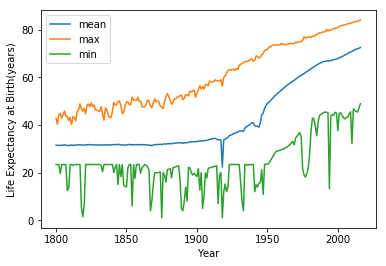

In [260]:
life_df.mean().plot(label='mean',legend=True)
life_df.max().plot(label='max',legend=True)
life_df.min().plot(label='min',legend=True)
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth(years)')

In [261]:
life_df.mean().idxmin()

1918

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!